In [2]:
!pip install pycaret
!pip install shap
!pip install graphviz
!pip install dtreeviz

# Data cleaning and Modelling.  

In [21]:

#general
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
from dtreeviz.trees import *
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats


from pycaret.classification import *
import pandas_datareader as web


In [6]:
transactions_ready = pd.read_csv('./../datasets/final_transactions_dataset.csv')
df_to_ml = transactions_ready[['investment','company','sector','horizon (days)','amount','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)', 'PE_ratio', 'ESG_ranking', 'EPS_ratio', 'PS_ratio','PB_ratio','NetProfitMargin_ratio','current_ratio','roa_ratio','roe_ratio']]

In [7]:
df_to_ml

,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,BAD,TSLA,AUTO,7,500,0.336212,0.336167,1.115540,0.009891,0.00,31.1,-0.94,5.65,9.71,-7.60,0.97,-3.54,-15.13
1,BAD,SC,BANK,600,3000,0.291036,0.247294,0.132227,0.018887,4.65,26.9,3.75,0.87,0.89,18.62,0.87,3.38,20.59
2,BAD,DB,BANK,330,5000,0.261244,0.260936,-0.210016,-0.127417,599.56,30.0,0.07,0.79,0.56,0.34,0.73,0.01,0.25
3,GOOD,AMZN,TECH,90,15000,0.329601,0.324660,1.129542,0.081071,0.00,27.4,-0.54,1.62,13.44,-0.27,1.12,-0.57,-2.29
4,GOOD,BBY,RETAIL,30,50,0.349990,0.348505,0.462873,0.021559,9.65,12.0,2.92,0.25,2.06,2.53,1.47,7.23,22.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161893,BAD,MSFT,TECH,30,4000,0.281871,0.281726,0.977717,0.017937,36.29,14.7,1.40,4.70,5.24,13.29,3.00,6.65,14.44
161894,BAD,KSS,RETAIL,60,50,0.226325,0.263863,0.001703,0.001127,13.03,12.9,4.29,0.60,1.88,4.56,1.91,6.01,14.72
161895,BAD,AAPL,TECH,90,100,0.275282,0.281343,0.997028,0.060599,11.29,16.5,2.25,2.53,4.26,22.27,1.28,17.44,40.24
161896,BAD,DB,BANK,540,1000,0.292055,0.517937,-0.210016,-0.208501,26.28,30.0,1.12,0.74,0.48,3.49,0.71,0.09,2.09


In [8]:
investment_map = {'GOOD':1, 'BAD':0} 
df_to_ml = df_to_ml.applymap(lambda s: investment_map.get(s) if s in investment_map else s)

In [9]:
company_map = {'AAPL':0,
 'AMZN':1,
 'MSFT':2,
 'GOOG':3,
 'FB':4,
 'NVDA':5,
 'F':6,
 'GM':7,
 'HMC':8,
 'TSLA':9,
 'TYO':10,
 'HOG':11,
 'WMT':12,
 'M':13,
 'TGT':14,
 'KSS':15,
 'COST':16,
 'BBY':17,
 'KO':18,
 'PEP':19,
 'PG':20,
 'OR':21,
 'AXP':22,
 'SC':23,
 'DB':24,
 'UBS':25,
 'BAC':26,
 'JPM':27}
df_to_ml = df_to_ml.applymap(lambda s: company_map.get(s) if s in company_map else s)

In [10]:
sector_map = {'TECH':0, 'AUTO':1, 'RETAIL': 2 , 'FMCG': 3, 'BANK':4}
df_to_ml = df_to_ml.applymap(lambda s: sector_map.get(s) if s in sector_map else s)
df_to_ml

,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,0,9,1,7,500,0.336212,0.336167,1.115540,0.009891,0.00,31.1,-0.94,5.65,9.71,-7.60,0.97,-3.54,-15.13
1,0,23,4,600,3000,0.291036,0.247294,0.132227,0.018887,4.65,26.9,3.75,0.87,0.89,18.62,0.87,3.38,20.59
2,0,24,4,330,5000,0.261244,0.260936,-0.210016,-0.127417,599.56,30.0,0.07,0.79,0.56,0.34,0.73,0.01,0.25
3,1,1,0,90,15000,0.329601,0.324660,1.129542,0.081071,0.00,27.4,-0.54,1.62,13.44,-0.27,1.12,-0.57,-2.29
4,1,17,2,30,50,0.349990,0.348505,0.462873,0.021559,9.65,12.0,2.92,0.25,2.06,2.53,1.47,7.23,22.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161893,0,2,0,30,4000,0.281871,0.281726,0.977717,0.017937,36.29,14.7,1.40,4.70,5.24,13.29,3.00,6.65,14.44
161894,0,15,2,60,50,0.226325,0.263863,0.001703,0.001127,13.03,12.9,4.29,0.60,1.88,4.56,1.91,6.01,14.72
161895,0,0,0,90,100,0.275282,0.281343,0.997028,0.060599,11.29,16.5,2.25,2.53,4.26,22.27,1.28,17.44,40.24
161896,0,24,4,540,1000,0.292055,0.517937,-0.210016,-0.208501,26.28,30.0,1.12,0.74,0.48,3.49,0.71,0.09,2.09


In [11]:
df_to_ml.to_csv('df_to_ml.csv')

In [12]:
df_to_ml

,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,0,9,1,7,500,0.336212,0.336167,1.115540,0.009891,0.00,31.1,-0.94,5.65,9.71,-7.60,0.97,-3.54,-15.13
1,0,23,4,600,3000,0.291036,0.247294,0.132227,0.018887,4.65,26.9,3.75,0.87,0.89,18.62,0.87,3.38,20.59
2,0,24,4,330,5000,0.261244,0.260936,-0.210016,-0.127417,599.56,30.0,0.07,0.79,0.56,0.34,0.73,0.01,0.25
3,1,1,0,90,15000,0.329601,0.324660,1.129542,0.081071,0.00,27.4,-0.54,1.62,13.44,-0.27,1.12,-0.57,-2.29
4,1,17,2,30,50,0.349990,0.348505,0.462873,0.021559,9.65,12.0,2.92,0.25,2.06,2.53,1.47,7.23,22.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161893,0,2,0,30,4000,0.281871,0.281726,0.977717,0.017937,36.29,14.7,1.40,4.70,5.24,13.29,3.00,6.65,14.44
161894,0,15,2,60,50,0.226325,0.263863,0.001703,0.001127,13.03,12.9,4.29,0.60,1.88,4.56,1.91,6.01,14.72
161895,0,0,0,90,100,0.275282,0.281343,0.997028,0.060599,11.29,16.5,2.25,2.53,4.26,22.27,1.28,17.44,40.24
161896,0,24,4,540,1000,0.292055,0.517937,-0.210016,-0.208501,26.28,30.0,1.12,0.74,0.48,3.49,0.71,0.09,2.09


### Restart point

In [13]:
df_to_ml = pd.read_csv('df_to_ml.csv')
df_to_ml.pop("Unnamed: 0")
df_to_ml

,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio
0,0,9,1,7,500,0.336212,0.336167,1.115540,0.009891,0.00,31.1,-0.94,5.65,9.71,-7.60,0.97,-3.54,-15.13
1,0,23,4,600,3000,0.291036,0.247294,0.132227,0.018887,4.65,26.9,3.75,0.87,0.89,18.62,0.87,3.38,20.59
2,0,24,4,330,5000,0.261244,0.260936,-0.210016,-0.127417,599.56,30.0,0.07,0.79,0.56,0.34,0.73,0.01,0.25
3,1,1,0,90,15000,0.329601,0.324660,1.129542,0.081071,0.00,27.4,-0.54,1.62,13.44,-0.27,1.12,-0.57,-2.29
4,1,17,2,30,50,0.349990,0.348505,0.462873,0.021559,9.65,12.0,2.92,0.25,2.06,2.53,1.47,7.23,22.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161893,0,2,0,30,4000,0.281871,0.281726,0.977717,0.017937,36.29,14.7,1.40,4.70,5.24,13.29,3.00,6.65,14.44
161894,0,15,2,60,50,0.226325,0.263863,0.001703,0.001127,13.03,12.9,4.29,0.60,1.88,4.56,1.91,6.01,14.72
161895,0,0,0,90,100,0.275282,0.281343,0.997028,0.060599,11.29,16.5,2.25,2.53,4.26,22.27,1.28,17.44,40.24
161896,0,24,4,540,1000,0.292055,0.517937,-0.210016,-0.208501,26.28,30.0,1.12,0.74,0.48,3.49,0.71,0.09,2.09


# Model Selection

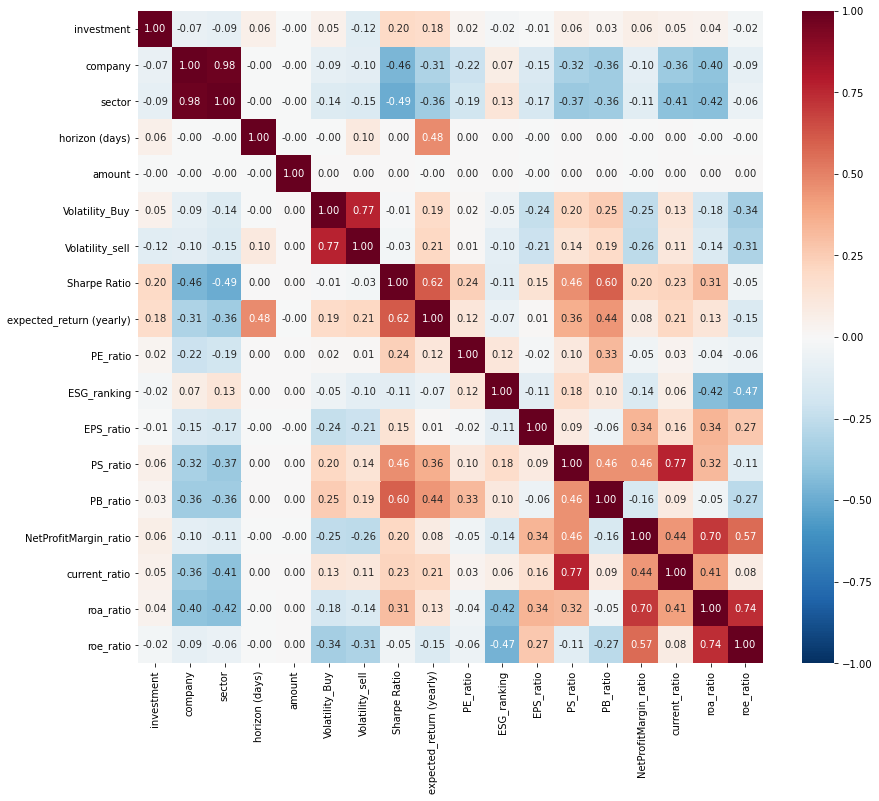

In [22]:
plt.figure(figsize=(14, 12))
crr = df_to_ml.corr()
heatmap = sns.heatmap(crr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r", fmt=".2f")
fig=heatmap.get_figure()
fig.savefig("corrplot.jpg")

In [6]:

ml_model = setup(df_to_ml, target = 'investment')

,Description,Value
0,session_id,2352
1,Target,investment
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(405258, 18)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best_models = compare_models(exclude=['catboost'] ,n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9244,0.9810,0.8895,0.8923,0.8909,0.8331,0.8331,9.0040
dt,Decision Tree Classifier,0.9212,0.9131,0.8866,0.8863,0.8865,0.8262,0.8262,0.5770
et,Extra Trees Classifier,0.8967,0.9677,0.8510,0.8512,0.8511,0.7720,0.7720,10.4100
xgboost,Extreme Gradient Boosting,0.8835,0.9613,0.8396,0.8272,0.8334,0.7439,0.7439,10.7120
knn,K Neighbors Classifier,0.8715,0.9420,0.8107,0.8174,0.8140,0.7159,0.7159,1.3920
lightgbm,Light Gradient Boosting Machine,0.8556,0.9427,0.7883,0.7938,0.7911,0.6807,0.6807,0.6900
gbc,Gradient Boosting Classifier,0.8071,0.8959,0.6365,0.7677,0.6960,0.5565,0.5618,16.2780
ada,Ada Boost Classifier,0.7585,0.8282,0.4918,0.7233,0.5854,0.4236,0.4394,3.2850
lda,Linear Discriminant Analysis,0.6970,0.6839,0.2525,0.6672,0.3663,0.2173,0.2616,0.7030
ridge,Ridge Classifier,0.6963,0.0000,0.2410,0.6739,0.3550,0.2108,0.2586,0.0910


## Decission Tree analysis

In [7]:
dt = create_model('dt')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9212,0.9130,0.8863,0.8866,0.8865,0.8261,0.8261
1,0.9216,0.9137,0.8880,0.8862,0.8871,0.8270,0.8270
2,0.9203,0.9124,0.8863,0.8844,0.8853,0.8243,0.8243
3,0.9239,0.9150,0.8859,0.8938,0.8899,0.8317,0.8317
4,0.9210,0.9126,0.8853,0.8868,0.8860,0.8255,0.8255
5,0.9204,0.9109,0.8799,0.8896,0.8847,0.8240,0.8240
6,0.9207,0.9124,0.8856,0.8857,0.8857,0.8249,0.8249
7,0.9231,0.9152,0.8895,0.8889,0.8892,0.8303,0.8303
8,0.9230,0.9155,0.8910,0.8875,0.8892,0.8302,0.8302
9,0.9226,0.9150,0.8900,0.8874,0.8887,0.8294,0.8294


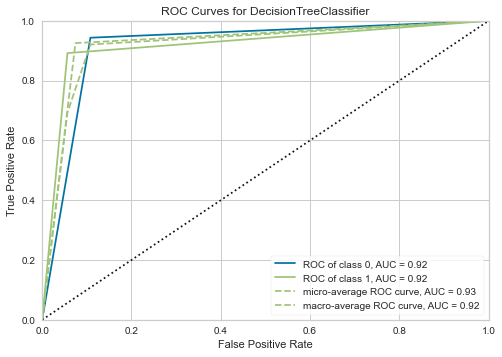

In [6]:
plot_model(dt)

In [ ]:
interpret_model(dt)

In [7]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7540,0.4303,0.6506,0.5180,0.3341,0.3482
1,0.7447,0.7892,0.5045,0.6772,0.5782,0.4007,0.4097
2,0.7424,0.7849,0.4701,0.6884,0.5587,0.3858,0.3998
3,0.7418,0.7840,0.4789,0.6819,0.5626,0.3873,0.3994
4,0.7352,0.7758,0.4541,0.6760,0.5433,0.3667,0.3812
5,0.7402,0.7796,0.4640,0.6852,0.5533,0.3795,0.3939
6,0.7395,0.7771,0.4588,0.6860,0.5499,0.3765,0.3916
7,0.7451,0.7865,0.4792,0.6911,0.5660,0.3938,0.4071
8,0.7389,0.7811,0.4623,0.6824,0.5512,0.3766,0.3908
9,0.7393,0.7821,0.4621,0.6838,0.5515,0.3773,0.3917


In [5]:
final_dt = finalize_model(dt)
final_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3838, splitter='best')

# Decision Tree Optimization


In [23]:
data_train, data_test, label_train, label_test = train_test_split(df_to_ml.drop('investment',1), df_to_ml['investment'], test_size = 0.33, random_state = 3838)

In [24]:
# Definir un clasificador
dt2 = DecisionTreeClassifier(random_state=7861, max_depth=2)

# Entrenar el clasificador con el dataset de train
dt2.fit(data_train, label_train)

# Evaluar en train
dt2_score_train = dt2.score(data_train, label_train)
# Evaluar en test
dt2_score_test = dt2.score(data_test, label_test)

In [25]:
# Definir un clasificador
dt3 = DecisionTreeClassifier(random_state=7861, max_depth=3)

# Entrenar el clasificador con el dataset de train
dt3.fit(data_train, label_train)

# Evaluar en train
dt3_score_train = dt3.score(data_train, label_train)
# Evaluar en test
dt3_score_test = dt3.score(data_test, label_test)

In [26]:
# Definir un clasificador
dt4 = DecisionTreeClassifier(random_state=7861, max_depth=4)

# Entrenar el clasificador con el dataset de train
dt4.fit(data_train, label_train)

# Evaluar en train
dt4_score_train = dt4.score(data_train, label_train)
# Evaluar en test
dt4_score_test = dt4.score(data_test, label_test)

In [27]:
# Definir un clasificador
dt5 = DecisionTreeClassifier(random_state=7861, max_depth=5)

# Entrenar el clasificador con el dataset de train
dt5.fit(data_train, label_train)

# Evaluar en train
dt5_score_train = dt5.score(data_train, label_train)
# Evaluar en test
dt5_score_test = dt5.score(data_test, label_test)

In [28]:
# Definir un clasificador
dt_max = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3838, splitter='best')

# Entrenar el clasificador con el dataset de train
dt_max.fit(data_train, label_train)

# Evaluar en train
dt_max_score_train = dt2.score(data_train, label_train)
# Evaluar en test
dt_max_score_test = dt2.score(data_test, label_test)

In [29]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>23} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>23} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>23} {:>20}'.format(5, dt5_score_train, dt5_score_test))
print('{:1} {:>23} {:>20}'.format('max', dt_max_score_train, dt_max_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2         0.659466585538992   0.6605836000524079
3      0.6904426067796923   0.6899320568252008
4      0.7134625844695818   0.7105021805454171
5      0.7583040628370716   0.7545435828326501
max       0.659466585538992   0.6605836000524079


# Decission Tree Visualization


In [30]:
graph_dt = dt4

In [31]:
model_dt = graph_dt.fit(data_train,label_train)

In [32]:
X = df_to_ml.drop('investment',1)
y = df_to_ml['investment']

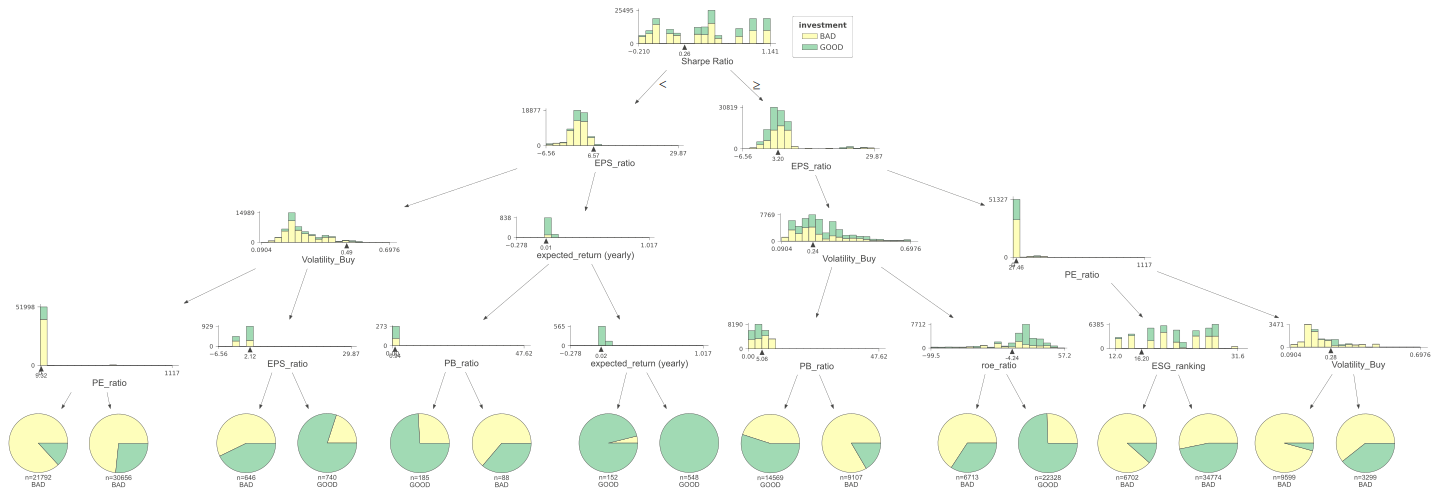

In [33]:
viz = dtreeviz(model_dt, X, y,
                target_name="investment",
                feature_names=['company','sector','horizon (days)','amount','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)', 'PE_ratio', 'ESG_ranking', 'EPS_ratio', 'PS_ratio','PB_ratio','NetProfitMargin_ratio','current_ratio','roa_ratio','roe_ratio'],
                class_names=["BAD", "GOOD"])
viz.save('finalDF_decision_tree_GOOD_FOR_MEDIUM.svg')
viz

In [34]:
viz_leaf_criterion(model_dt, display_type = "text")

leaf 4 has 0.22876159787865913 GINI
leaf 5 has 0.39081507387620174 GINI
leaf 7 has 0.4896082610266588 GINI
leaf 8 has 0.31999999999999995 GINI
leaf 11 has 0.38435988578754154 GINI
leaf 12 has 0.46195005945303214 GINI
leaf 14 has 0.07465359600339339 GINI
leaf 15 has 0.0 GINI
leaf 19 has 0.49501939070480716 GINI
leaf 20 has 0.2762123887415434 GINI
leaf 22 has 0.45013486163876426 GINI
leaf 23 has 0.3802179344441109 GINI
leaf 26 has 0.20415542623624772 GINI
leaf 27 has 0.4979256389555442 GINI
leaf 29 has 0.08193916637647802 GINI
leaf 30 has 0.4772230715291762 GINI


In [20]:
model_dt = graph_dt.fit(data_test,label_test)

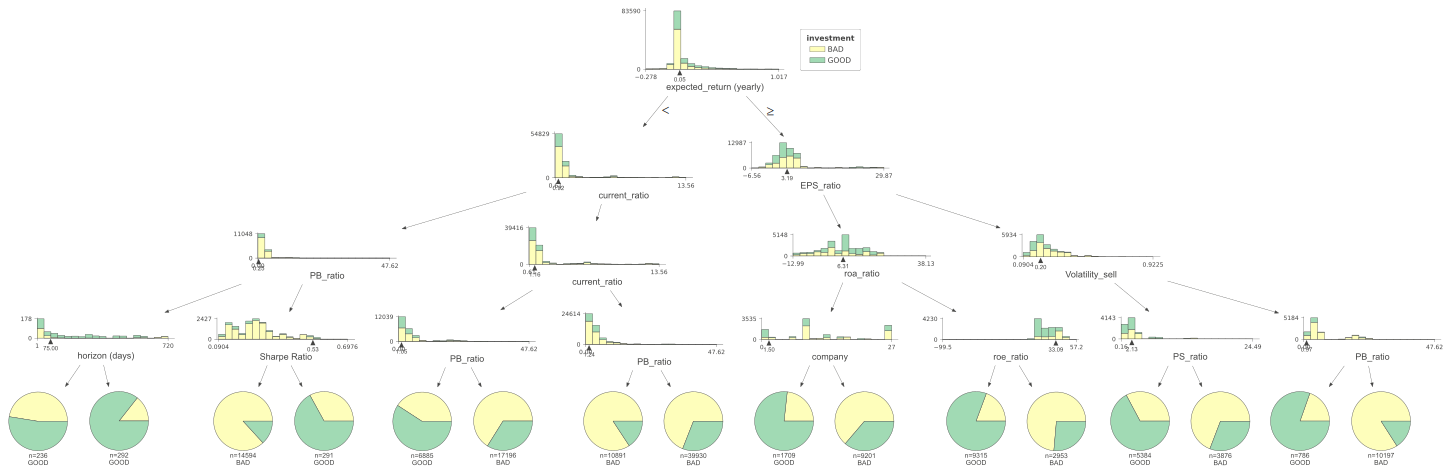

In [21]:
viz = dtreeviz(model_dt, data_test, label_test,
                target_name="investment",
                feature_names=['company','sector','horizon (days)','amount','Volatility_Buy','Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)', 'PE_ratio', 'ESG_ranking', 'EPS_ratio', 'PS_ratio','PB_ratio','NetProfitMargin_ratio','current_ratio','roa_ratio','roe_ratio'],
                class_names=["BAD", "GOOD"])
viz.save('finalDF_decision_tree_4_test.svg')
viz

In [22]:
viz_leaf_criterion(model_dt, display_type = "text")

leaf 4 has 0.4987072680264292 GINI
leaf 5 has 0.2462938637643085 GINI
leaf 7 has 0.22921170782318046 GINI
leaf 8 has 0.4421298756509725 GINI
leaf 11 has 0.4831744675599603 GINI
leaf 12 has 0.4479914360929672 GINI
leaf 14 has 0.2654714586060969 GINI
leaf 15 has 0.4275084967438322 GINI
leaf 19 has 0.35729886283370216 GINI
leaf 20 has 0.46216582805526885 GINI
leaf 22 has 0.3117925739223786 GINI
leaf 23 has 0.3884186720754055 GINI
leaf 26 has 0.44083813357060375 GINI
leaf 27 has 0.4265079966047578 GINI
leaf 29 has 0.315081353715466 GINI
leaf 30 has 0.2680631973770733 GINI


# Deployment dt4 model

In [30]:
#Serialize the model and save
import joblib
joblib.dump(dt4, 'dt4.pkl')
print("dt4 Model Saved")
#Load the model
lr = joblib.load('dt4.pkl')
# Save features from training
rnd_columns = list(X.columns)
joblib.dump(rnd_columns, 'dt4_columns.pkl')
print("dt4 Model Colums Saved")

dt4 Model Saved
dt4 Model Colums Saved


### obtaining json objects to try api


In [5]:
df_to_ml['json'] = df_to_ml.to_json(orient='records', lines=True).splitlines()

In [6]:
df_to_ml

,investment,company,sector,horizon (days),amount,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),PE_ratio,ESG_ranking,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio,json
0,0,17,2,2,100,0.383666,0.385748,0.383666,0.001437,12.58,12.0,3.73,0.38,3.19,3.01,1.49,8.69,26.69,"{""investment"":0,""company"":17,""sector"":2,""horiz..."
1,1,26,4,330,15000,0.322809,0.236350,0.322809,0.170969,11.39,26.3,1.26,1.71,0.54,15.70,0.92,0.67,5.54,"{""investment"":1,""company"":26,""sector"":4,""horiz..."
2,0,22,4,7,3000,0.238642,0.235491,0.238642,0.002824,10.58,19.8,5.64,1.67,2.60,15.68,1.91,3.39,25.78,"{""investment"":0,""company"":22,""sector"":4,""horiz..."
3,0,15,2,5,20000,0.428559,0.429340,0.428559,0.000094,11.09,12.9,3.27,0.36,1.25,3.17,1.60,4.41,11.35,"{""investment"":0,""company"":15,""sector"":2,""horiz..."
4,1,27,4,360,15000,0.194612,0.254011,0.194612,0.149979,9.38,27.9,5.46,1.87,0.81,19.91,0.99,0.81,8.91,"{""investment"":1,""company"":27,""sector"":4,""horiz..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405253,0,7,1,480,50000,0.241103,0.253235,0.241103,0.053763,23.98,30.6,1.19,0.31,1.07,1.29,1.27,1.18,4.87,"{""investment"":0,""company"":7,""sector"":1,""horizo..."
405254,1,23,4,300,50000,0.410470,0.535448,0.410470,0.009444,4.40,26.9,2.16,0.50,0.74,11.58,0.92,2.16,17.79,"{""investment"":1,""company"":23,""sector"":4,""horiz..."
405255,1,11,1,210,3000,0.316220,0.359625,0.316220,0.025642,12.02,16.3,3.71,1.46,4.27,12.06,1.74,7.02,31.43,"{""investment"":1,""company"":11,""sector"":1,""horiz..."
405256,0,0,0,270,500,0.173693,0.218904,0.173693,0.181797,16.74,16.5,2.43,3.55,5.90,21.12,1.24,13.83,37.37,"{""investment"":0,""company"":0,""sector"":0,""horizo..."


In [8]:
df_to_ml['json'][0]


'{"investment":0,"company":17,"sector":2,"horizon (days)":2,"amount":100,"Volatility_Buy":0.3836655614,"Volatility_sell":0.3857480376,"Sharpe Ratio":0.3836655614,"expected_return (yearly)":0.0014372518,"PE_ratio":12.58,"ESG_ranking":12.0,"EPS_ratio":3.73,"PS_ratio":0.38,"PB_ratio":3.19,"NetProfitMargin_ratio":3.01,"current_ratio":1.49,"roa_ratio":8.69,"roe_ratio":26.69}'

In [10]:
df_to_ml['json'][4]

'{"investment":1,"company":27,"sector":4,"horizon (days)":360,"amount":15000,"Volatility_Buy":0.194611787,"Volatility_sell":0.2540114659,"Sharpe Ratio":0.194611787,"expected_return (yearly)":0.1499786808,"PE_ratio":9.38,"ESG_ranking":27.9,"EPS_ratio":5.46,"PS_ratio":1.87,"PB_ratio":0.81,"NetProfitMargin_ratio":19.91,"current_ratio":0.99,"roa_ratio":0.81,"roe_ratio":8.91}'